In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

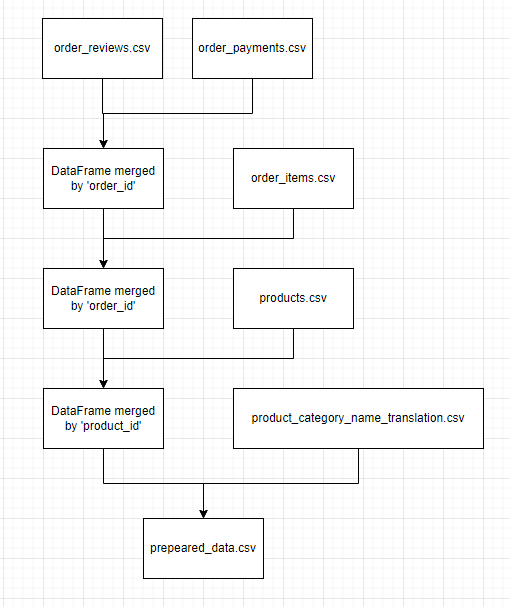

In [4]:
df=pd.read_csv('/content/prepeared_data.csv')
df

,payment_value,review_score,review_comment_title,review_comment_message,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,99.33,1.0,recomer,produto com qualidade ruim amassado e descasca...,79.80,19.53,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
1,93.72,4.0,no_title,no_message,79.80,13.92,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
2,340.08,4.0,no_title,no_message,316.05,24.03,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,home_construction
3,67.12,4.0,no_title,otimo produto recebir no prazo certorecomento,54.40,12.72,57.0,565.0,4.0,800.0,38.0,38.0,22.0,home_construction
4,63.74,5.0,no_title,no_message,54.40,9.34,57.0,565.0,4.0,800.0,38.0,38.0,22.0,home_construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108345,149.08,5.0,no_title,no_message,89.90,59.18,47.0,482.0,2.0,16100.0,35.0,65.0,44.0,luggage_accessories
108346,415.66,4.0,no_title,a mala é de bom tamanho bonita \r\nmas o mater...,129.90,77.93,47.0,482.0,2.0,16100.0,35.0,65.0,44.0,luggage_accessories
108347,415.66,4.0,no_title,a mala é de bom tamanho bonita \r\nmas o mater...,129.90,77.93,47.0,482.0,2.0,16100.0,35.0,65.0,44.0,luggage_accessories
108348,25.77,5.0,no_title,produto chegou rápido com a qualidade esperada...,109.90,24.05,47.0,482.0,2.0,16100.0,35.0,65.0,44.0,luggage_accessories


In [5]:
data=df.copy()


In [6]:
data['review_comment_message'].fillna('', inplace=True)

## Overview
The key concept of this model is to understand sentimental of revies from the database

## Data Description
- **Dataset Used**: prepeared_data.csv.
- **Source**: Internal company database.
- **Preprocessing Steps**: Handled missing values, normalized numerical features.

## Model Details
- **Type of Model**: MultinomialNB


## Model Details
- **Type of Model**: RandomForestClassifier

I decided to use two classification models to evaluate which will have better scores.





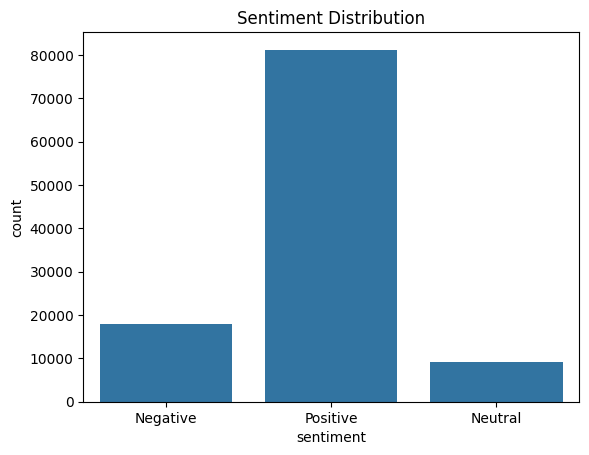

              precision    recall  f1-score   support

    Negative       0.74      0.68      0.71      3578
     Neutral       0.39      0.09      0.14      1848
    Positive       0.87      0.96      0.91     16244

    accuracy                           0.84     21670
   macro avg       0.67      0.58      0.59     21670
weighted avg       0.81      0.84      0.81     21670

              precision    recall  f1-score   support

    Negative       0.83      0.70      0.76      3578
     Neutral       0.87      0.15      0.26      1848
    Positive       0.87      0.98      0.92     16244

    accuracy                           0.87     21670
   macro avg       0.85      0.61      0.65     21670
weighted avg       0.86      0.87      0.84     21670

         Actual Predicted_NB Predicted_RFC
65717  Negative     Negative      Negative
39905  Positive     Positive      Positive
32004  Positive     Positive      Positive
81674   Neutral     Negative      Negative
70797  Positive     Pos

In [7]:
#Treshholds preparing
data['sentiment'] = data['review_score'].apply(lambda x: 'Positive' if x > 3 else 'Negative' if x < 3 else 'Neutral')

sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

# sentiment analysis model
X = data['review_comment_message']
y = data['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

pipeline_2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier())
])

pipeline_1.fit(X_train, y_train)
pipeline_2.fit(X_train, y_train)


y_pred_NB = pipeline_1.predict(X_test)
y_pred_RFC = pipeline_2.predict(X_test)

print(classification_report(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_RFC))


results = pd.DataFrame({
    'Actual': y_test,
    'Predicted_NB': y_pred_NB,
    'Predicted_RFC':y_pred_RFC
})

print(results)


In [8]:
# Function to predict sentiment
def analyze_comment(comment):
    sentiment_NB = pipeline_1.predict([comment])[0]
    sentiment_RFC = pipeline_2.predict([comment])[0]
    return {'sentiment_NB': sentiment_NB, 'sentiment_RFC': sentiment_RFC}

# Test the function with examples of each class
example_comments = [
    "produto com qualidade ruim amassado e descascado...",
    "otimo produto recebi no prazo certo recomendo",
    "it was okay"
]

for comment in example_comments:
    result = analyze_comment(comment)
    print(f"Comment: {comment}")
    print(f"Predicted Sentiment 1st with NB 2nd with RFC: {result['sentiment_NB'], result['sentiment_RFC']}")
    print()

Comment: produto com qualidade ruim amassado e descascado...
Predicted Sentiment 1st with NB 2nd with RFC: ('Negative', 'Negative')

Comment: otimo produto recebi no prazo certo recomendo
Predicted Sentiment 1st with NB 2nd with RFC: ('Positive', 'Positive')

Comment: it was okay
Predicted Sentiment 1st with NB 2nd with RFC: ('Positive', 'Positive')



Based on the test function above, the Random Forest performs better with sentiments than Naive Bayes. However, classifying "Netural" sentiments is challenging for both models, as they often misclassify them as "Positive" or "Negative."." To address this issue, one potential solution could be to increase the number of "Neutral" comments in the data to provide the models with more samples for training in this category.

I don't see a reason to use ML algorithms here, so I decided to use regular extensions to perform price recognition tasks.

In [9]:
import re


def extract_prices(comment):
    # Регулярний вираз для пошуку цін
    pattern = r'\b(?:\d+[.,]?\d*\s?(?:USD|US dollars|dollars|$|reais|R$|))|(?:\$|USD|BRL)\s?\d+[.,]?\d*\b'
    matches = re.findall(pattern, comment)
    return matches if matches else None

# Тестування
example_comments = [
    "The product costs 29.99 USD and is worth every penny.",
    "O preço do produto é de 500 reais, o que é muito vantajoso.",
]

for comment in example_comments:
    prices = extract_prices(comment)
    print(f"Comment: {comment}")
    print(f"Extracted Prices: {prices}")
    print()

Comment: The product costs 29.99 USD and is worth every penny.
Extracted Prices: ['29.99 USD']

Comment: O preço do produto é de 500 reais, o que é muito vantajoso.
Extracted Prices: ['500 reais']

